# Assignment 14 (Decision Trees) Q1) Company Data

## Q1. Decision Tree Assignment


## About the data: 
## Let’s consider a Company dataset with around 10 variables and 400 records. 
## The attributes are as follows: 
##  Sales -- Unit sales (in thousands) at each location
##  Competitor Price -- Price charged by competitor at each location
##  Income -- Community income level (in thousands of dollars)
##  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
##  Population -- Population size in region (in thousands)
##  Price -- Price company charges for car seats at each site
##  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
##  Age -- Average age of the local population
##  Education -- Education level at each location
##  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
##  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
## The company dataset looks like this: 
 
## Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

## Data collection and description 

In [3]:
company_df = pd.read_csv("Company_Data.csv")

In [4]:
company_df1 = company_df.copy()

In [5]:
company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# Summary Statistics
company_df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Checking for null values
company_df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
# Checking Datatypes for each column of Dataset
company_df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
# Displaying shape of dataset (rows,columns)
company_df1.shape

(400, 11)

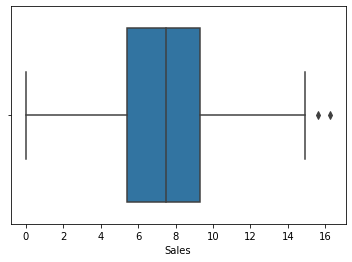

In [10]:
# Checking for outliers
ax = sns.boxplot(company_df1['Sales'])

## This Data has 2 Outlier instances 

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: 0.18556036318721578
Kurtosis: -0.08087736743346197


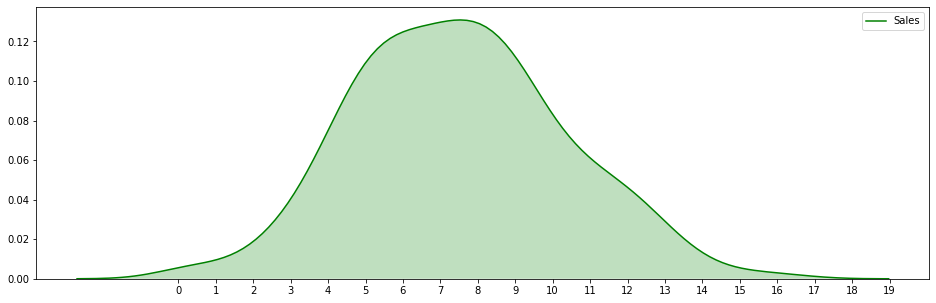

In [12]:
plt.figure(figsize=(16,5))
print("Skewness: {}".format(company_df1['Sales'].skew()))
print("Kurtosis: {}".format(company_df1['Sales'].kurtosis()))
ax = sns.kdeplot(company_df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## The Data is Skewed on the Right
## The Data has Negative Kurtosis 

In [13]:
obj_column = company_df1.select_dtypes(include='object').columns.tolist()

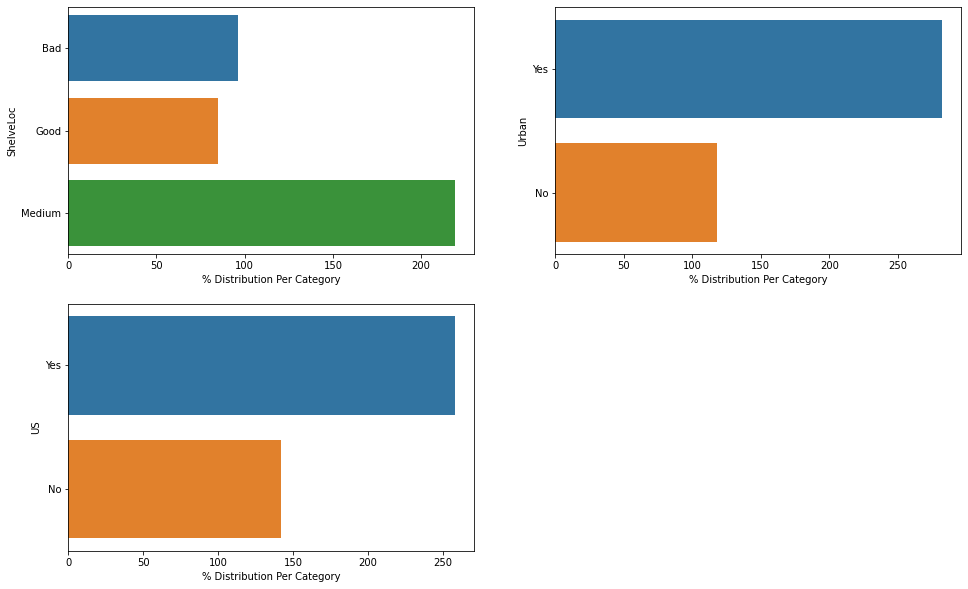

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company_df1,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

## From above graphs we can say that Medium ShelveLoc has more distributed values. Most of the distribution per category in Urban column is Yes and most of the distribution per category in US Column is Yes. 

In [15]:
num_columns = company_df1.select_dtypes(exclude='object').columns.tolist()

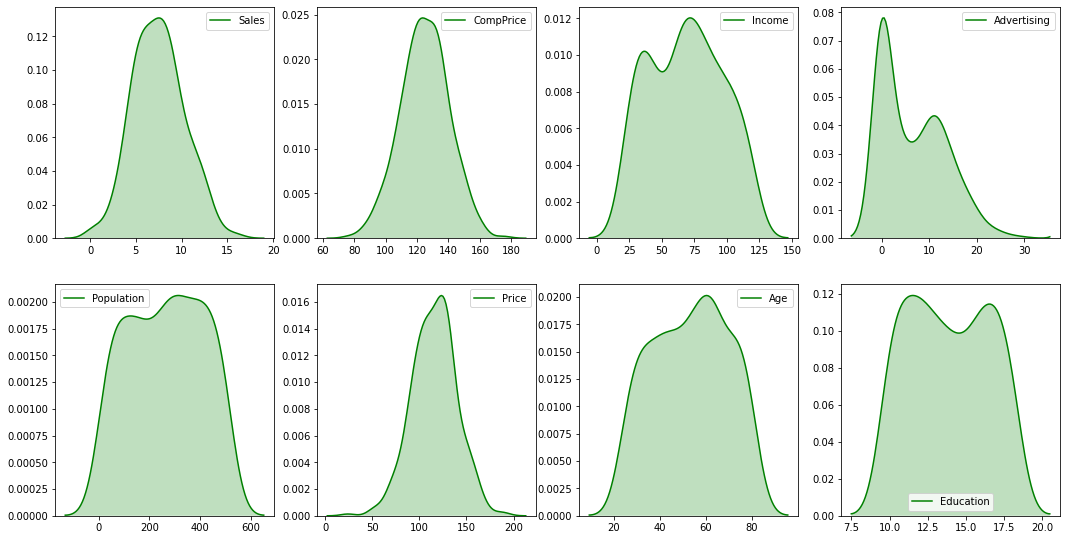

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
Kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company_df[col],color='g',shade=True)
plt.show()
num_data = company_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## From above we can say that Sales,Income,Advertising,Population,Age and Education have negative kurtosis. 

## Correlation Analysis 

<AxesSubplot:>

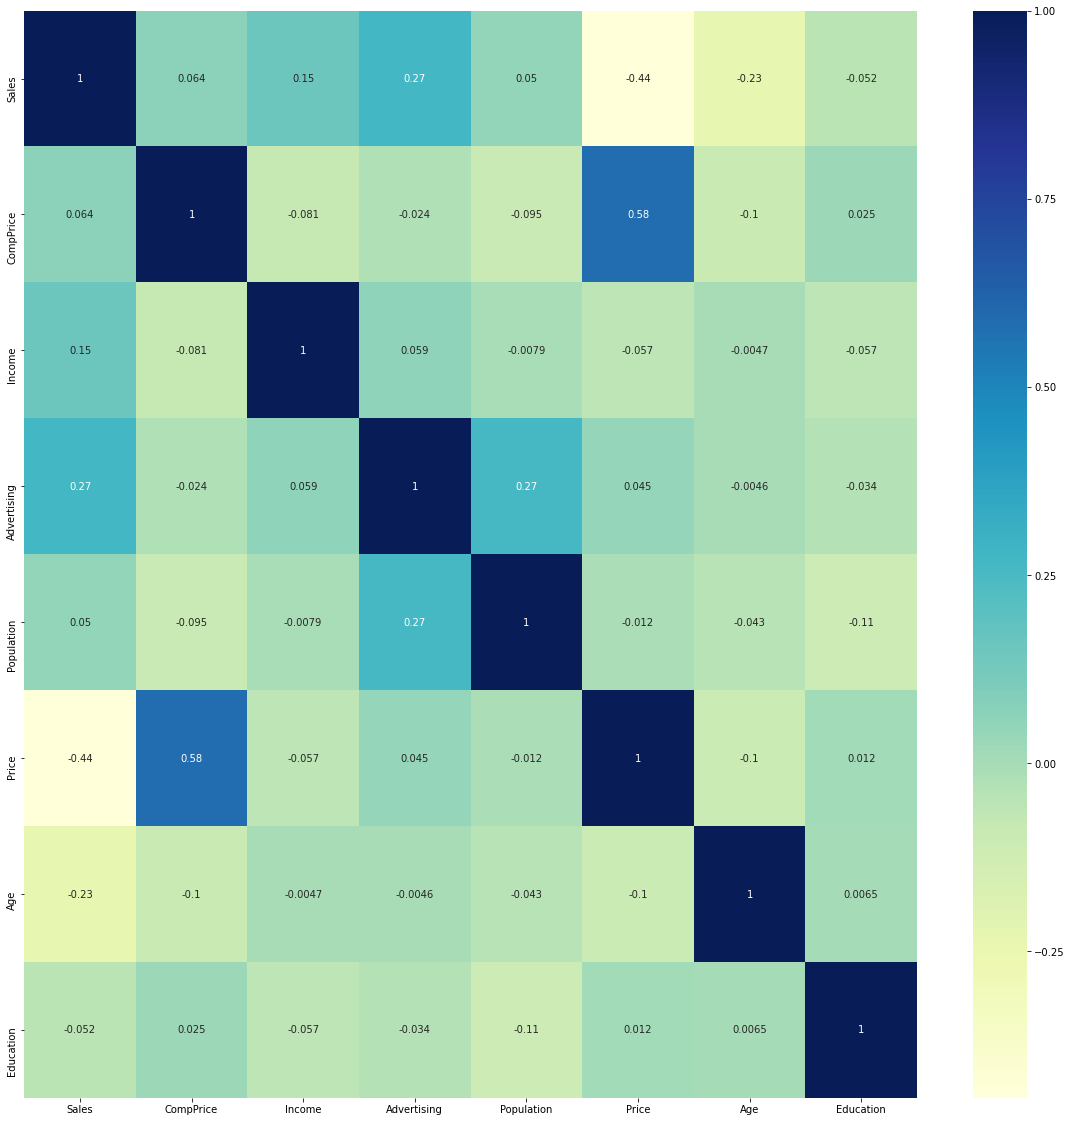

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(company_df1.corr(),cmap='YlGnBu',annot=True)

## Decision Tree - Model
## Since the target variable is continious, we create a class of the value based on the mean
## <= 7.49 == "Small" and > 7.49 == "large"

In [18]:
company_df1 = pd.get_dummies(company_df1, columns = ['ShelveLoc','Urban','US'])

In [19]:
company_df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
5,10.81,124,113,13,501,72,78,16,1,0,0,1,0,0,1
6,6.63,115,105,0,45,108,71,15,0,0,1,0,1,1,0
7,11.85,136,81,15,425,120,67,10,0,1,0,0,1,0,1
8,6.54,132,110,0,108,124,76,10,0,0,1,1,0,1,0
9,4.69,132,113,0,131,124,76,17,0,0,1,1,0,0,1


In [20]:
company_df1["sales"]="small"
company_df1.loc[company_df1["Sales"]>7.49,"sales"]="large"
company_df1.drop(["Sales"],axis=1,inplace=True)

In [21]:
x = company_df1.iloc[:,0:14]
y = company_df1.iloc[:,14]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [23]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [24]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
pred_train = model.predict(x_train)

In [26]:
pred_train

array(['large', 'large', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'small', 'small', 'large', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'large',
       'large', 'large', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'large',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'large', 'large', 'small',
       'small', 'large', 'small', 'large', 'large', 'large', 'large',
       'large', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'lar

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [29]:
pred_test = model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7375

In [31]:
confusion_matrix(y_test,pred_test)

array([[30, 10],
       [11, 29]], dtype=int64)

In [32]:
company_df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [33]:
company_df2

,Actual,Predicted
2,large,large
332,small,large
107,large,large
323,large,large
57,small,small
394,small,small
82,large,large
158,large,large
338,small,small
62,small,small


In [34]:
cols = list(company_df1.columns)

In [35]:
predictors = cols[0:14]
target = cols[14]

In [36]:
dot_data = StringIO()

In [37]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [39]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [40]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [41]:
graph.write_png('Company1.png')

True

## Conclusion

In [42]:
img = mpimg.imread('Company1.png')

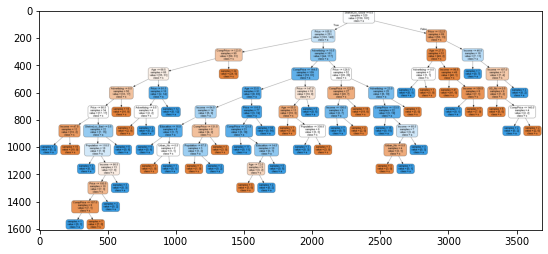

In [43]:
plt.imshow(img)

In [44]:
model.feature_importances_

array([0.2100201 , 0.13526948, 0.1226309 , 0.03634359, 0.25895648,
       0.09572955, 0.0197089 , 0.01260492, 0.08335112, 0.        ,
       0.01639144, 0.        , 0.00899351, 0.        ])

In [45]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [46]:
fi

,feature,importance
4,Price,0.258956
0,CompPrice,0.210020
1,Income,0.135269
2,Advertising,0.122631
5,Age,0.095730
8,ShelveLoc_Good,0.083351
3,Population,0.036344
6,Education,0.019709
10,Urban_No,0.016391
7,ShelveLoc_Bad,0.012605


## As seen in the above table Price is most important feature